# Survival Analysis using RStan

## Introduction:

#### Survival Analysis is used to estimate the lifespan of a particular population under study. It is also called ‘Time to Event’ Analysis as the goal is to estimate the time for an individual or a group of individuals to experience an event of interest. This time estimate is the duration between birth and death events[1]. Survival Analysis was originally developed and used by Medical Researchers and Data Analysts to measure the lifetimes of a certain population[1]. But, over the years, it has been used in various other applications such as predicting churning customers/employees, estimation of the lifetime of a Machine, etc. The birth event can be thought of as the time of a customer starts their membership with a company, and the death event can be considered as the customer leaving the company.
[Blog Post](https://towardsdatascience.com/survival-analysis-part-a-70213df21c2e)

## Data

In [1]:
# reading in raw data from web url
#df <- read.csv('https://raw.githubusercontent.com/fsdias/blog_data/main/survival/sheep.deaths.csv')

In [32]:
#saveRDS(df, "goat.rds")

In [35]:
df = readRDS("goat.rds")

In [36]:
str(df)

'data.frame':	150 obs. of  4 variables:
 $ death : int  20 34 1 2 3 3 50 26 1 50 ...
 $ status: int  1 1 1 1 1 1 0 1 1 0 ...
 $ weight: num  5.38 7.41 9.27 6.23 5.23 ...
 $ group : chr  "A" "A" "A" "A" ...


#### death $\rightarrow$ number of month the goat survived max = 50 the study period. which menas the animal outlived the experiment. 
#### weight $\rightarrow$ sheep weight at time 0 when the study kicks off
#### group $\rightarrow$ treatment group: A = high, B = low, C = placebo

## EDA

In [4]:
library(tidyverse)

── Attaching packages ─────────────────────────────────────── tidyverse 1.3.2 ──
✔ ggplot2 3.3.6      ✔ purrr   0.3.4 
✔ tibble  3.1.8      ✔ dplyr   1.0.10
✔ tidyr   1.2.1      ✔ stringr 1.4.1 
✔ readr   2.1.2      ✔ forcats 0.5.2 
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()


In [37]:
goat <- df %>% group_by(group)

In [38]:
group_id <- goat %>% group_indices()

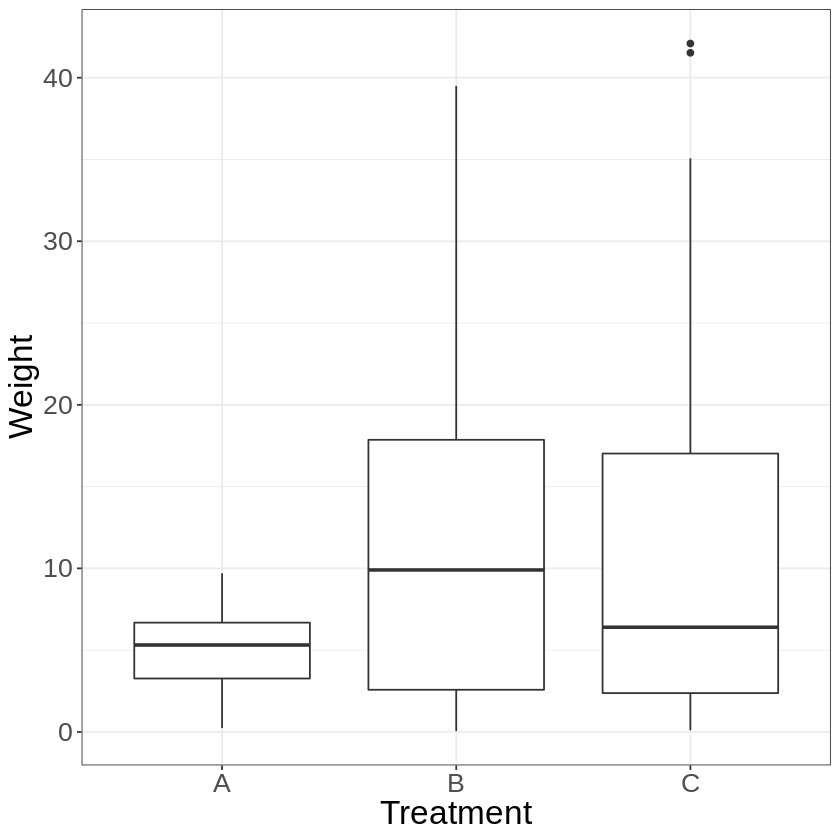

In [39]:
ggplot(goat, mapping=aes(y=weight, x=group)) + geom_boxplot() + theme_bw() +
labs(y="Weight", x="Treatment") +
theme(axis.title=element_text(size=20)) + theme(text=element_text(size=20))

### Empirical Complementary Cumulative Distribution Function

In [40]:
# converting weight into categorical variables
df <- df %>% mutate(weight_rank = ntile(weight, 4))

In [41]:
library(survival)
library(survminer)

Loading required package: ggpubr


Attaching package: ‘survminer’


The following object is masked from ‘package:survival’:

    myeloma




In [42]:
fit1 <- survfit(Surv(death, status)~group, data=df)
fit2 <- survfit(Surv(death, status)~weight_rank, data=df)

In [43]:
splots <- list()
splots[[1]] <- ggsurvplot(fit2, xlim=c(0,50)) + labs(x="Time (days)")
splots[[2]] <- ggsurvplot(fit2, xlim=c(0,50)) + labs(x="Time (days)")

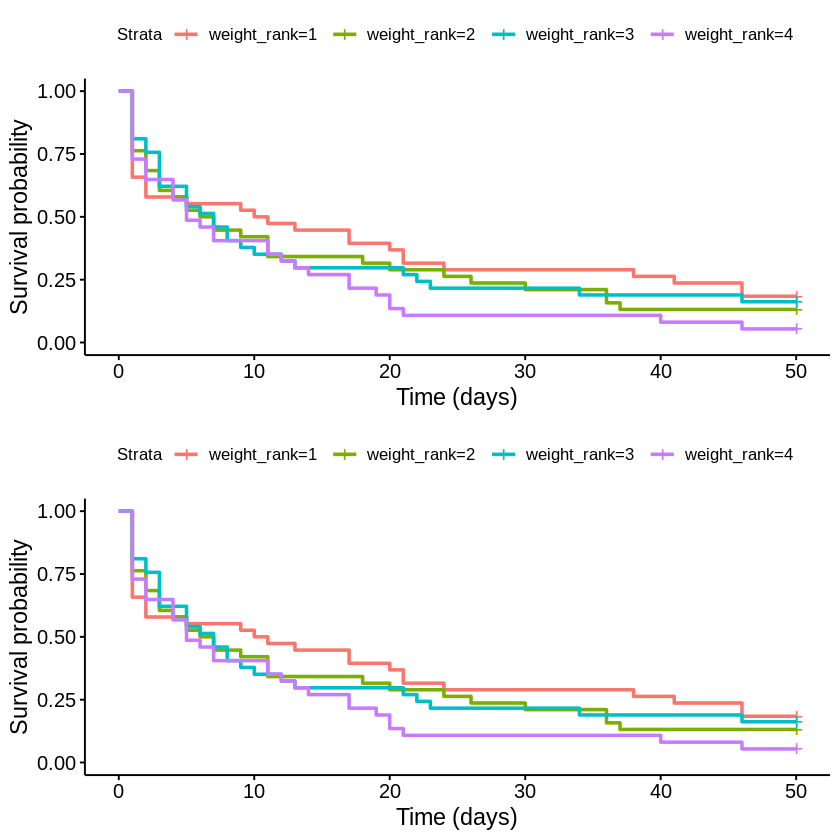

In [44]:
arrange_ggsurvplots(splots, print=TRUE, ncol=1, nrow=2, risk.table.height=0.8)

## Modeling

In [73]:
library("rstan")
library("parallel")

In [74]:
options(mc.cores = parallel::detectCores())
rstan_options(auto_write = TRUE)
Sys.setenv(LOCAL_CPPFLAGS = '-march=native')

In [85]:
ls()

[1] "df"              "dl"              "fit"             "fit1"           
 [5] "fit2"            "goat"            "GOAT"            "group_id"       
 [9] "splots"          "theme_Posterior"

In [86]:
if ("sm" %in% ls()){
    remove(sm)
}

In [87]:
sm = stan_model("goat.stan")

Warning message in stan_model("goat.stan"):
“c(20, 34, 1, 2, 3, 3, 50, 26, 1, 50, 21, 3, 13, 11, 22, 50, 50, 1, 50, 9, 50, 1, 13, 50, 50, 1, 6, 50, 50, 50, 36, 3, 46, 10, 50, 1, 18, 3, 36, 37, 50, 7, 1, 1, 7, 24, 4, 50, 12, 17, 1, 1, 1, 21, 50, 50, 1, 46, 50, 1, 8, 2, 12, 3, 2, 1, 5, 50, 1, 2, 2, 4, 17, 5, 1, 11, 8, 1, 5, 2, 41, 5, 21, 1, 38, 50, 3, 19, 4, 7, 1, 46, 2, 5, 40, 4, 50, 2, 1, 17, 7, 1, 5, 1, 1, 5, 6, 2, 24, 1, 1, 1, 1, 7, 13, 6, 11, 46, 5, 14, 2, 1, 20, 2, 20, 1, 23, 11, 1, 1, 20, 9, 1, 1, 1, 1, 7, 11, 1, 3, 1, 5, 9, 21, 10, 11, 
30, 1, 1, 17)c(1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1

---

### Data Listing

In [88]:
dl <- list(
  N = nrow(goat),
  G = length(unique(goat$group)),
  time = goat$death,
  weight = (goat$weight-12)/12,
  event = goat$status,
  gid = group_id)

### Sampling

In [89]:
if ("fit" %in% ls()){
    remove(fit)
}

In [90]:
fit = sampling(object = sm, data=dl, 
               init="random", 
               control=list(adapt_delta = 0.95), 
               chains=4, 
               iter=999, warmup=666, 
               thin=1
            )

---

In [ ]:
summary(fit)

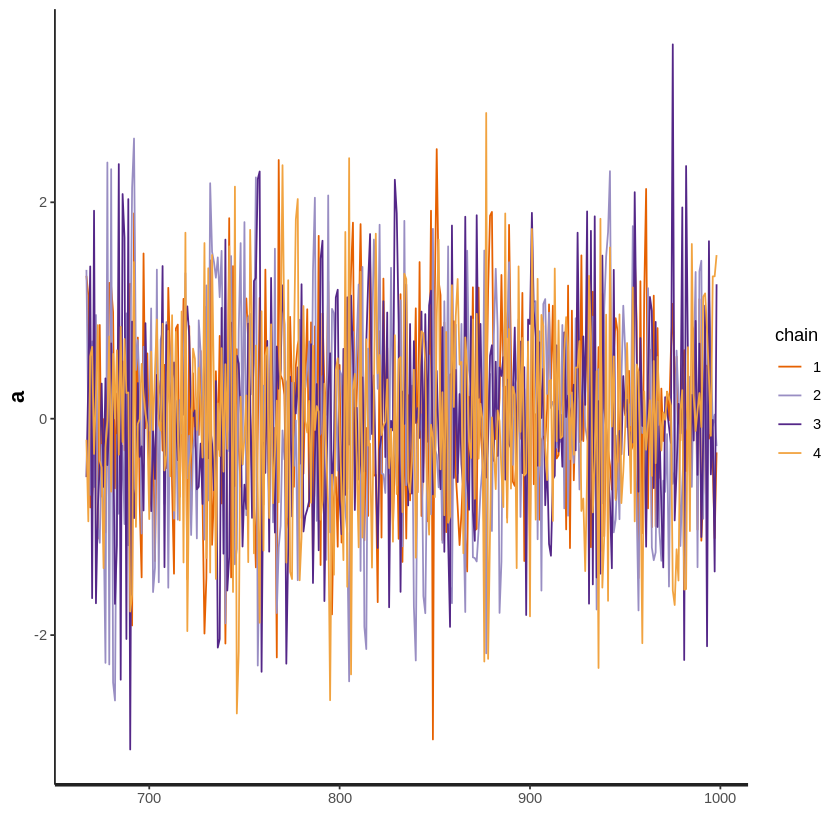

In [91]:
traceplot(fit, pars=c("a"))

ci_level: 0.9 (90% intervals)

outer_level: 0.95 (95% intervals)



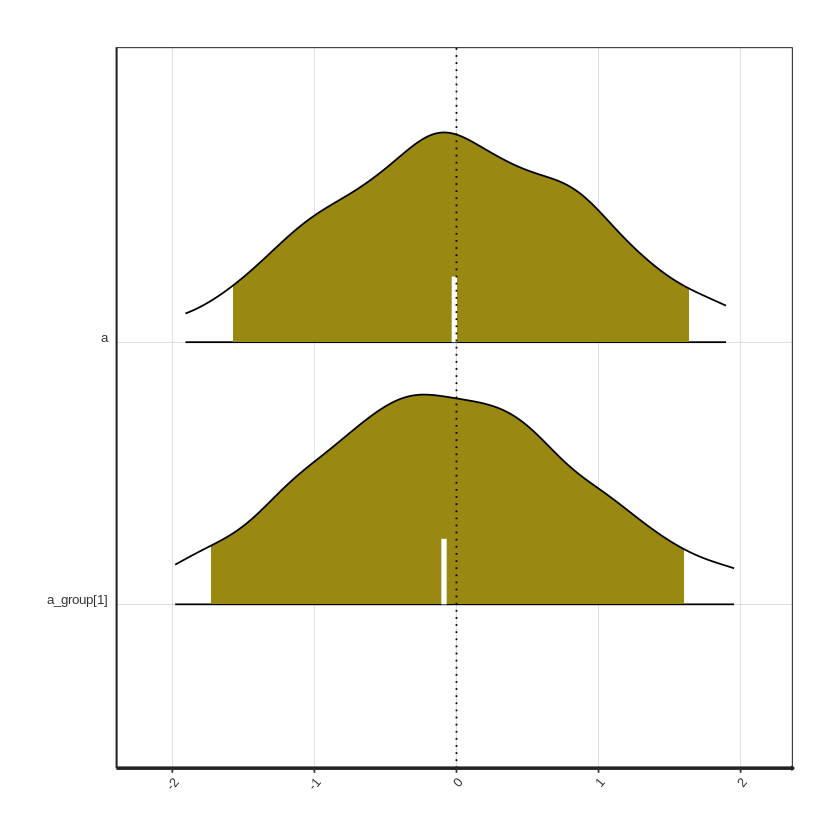

In [92]:

plot(fit, 
     pars=names(fit)[c(1,2)], 
     show_density=TRUE,
     fill_color="#998811",
     est_color="#ffffff",
     ci_level=0.9, outer_level=0.95) +
geom_vline(xintercept = 0, linetype=3, size=0.5) + theme_Posterior

### Prior Predictive Checks

ERROR: Error in fit$pred: $ operator not defined for this S4 class
